<a href="https://colab.research.google.com/github/axel-sirota/normalise-data-pandas/blob/main/module3/NormaliseDataPandas_Mod3Demo1_SimpleScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply simple scaling on Pandas

## Prep

As we have seen, data normalisation is a technique in which we put each specific feature of a dataset (ie: column of a Pandas DataFrame) into the same scale. This brings a better noise to signal ratio to learning algorithms coming afterwards.


<img src="https://dl.dropboxusercontent.com/s/7gv66nlbacdc1n9/normalise.png"/>



To start things, let's download a dataset I created with 3 features, each with its own distribution and scales

In [1]:
%%writefile get_data.sh
if [ ! -f data.csv ]; then
  wget -O data.csv https://raw.githubusercontent.com/axel-sirota/normalise-data-pandas/main/data/data.csv
fi

Overwriting get_data.sh


In [2]:
!bash get_data.sh

In [3]:
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv('data.csv')
data

,uniform_negative,uniform_positive,normal
0,-3.776188,6.666627,3.253714
1,-4.856584,3.437850,2.436924
2,-3.444649,3.844239,5.644002
3,-4.716353,7.082680,2.388518
4,-4.179619,3.576941,6.439704
...,...,...,...
4995,-3.475292,11.878456,6.403464
4996,-3.000431,10.887165,4.765301
4997,-1.430485,9.745799,4.457029
4998,-2.616039,3.713145,4.751464


You can alreadys see from the titles the distribution we used. Let's see how we can deal with this data features

## Detecting the scale of our dataset

One very good idea to check the scales of our dataset is to do a boxplot, which also gives us an understanding of the distribution

<Axes: >

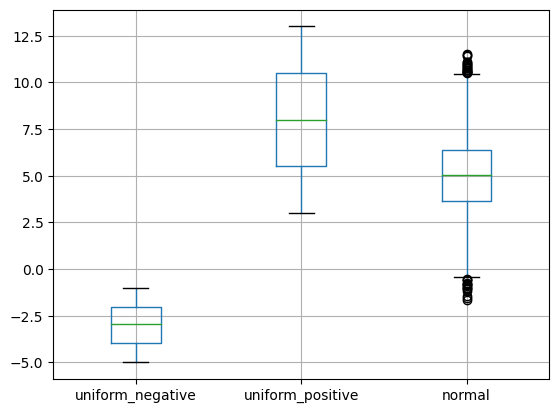

In [4]:
data.boxplot()

As we can verify the first two features appear to be uniform, with different scales and means; and the third feature has a wider scale and appears to be normal. We won't see how to test this, but if you are interested just ask me at axel.sirota@gmail.com 

In [5]:
data.describe()

,uniform_negative,uniform_positive,normal
count,5000.000000,5000.000000,5000.000000
mean,-2.990926,7.992664,4.992618
std,1.139189,2.882320,2.024932
min,-4.998775,3.000098,-1.686932
25%,-3.966516,5.490951,3.629852
50%,-2.947714,7.964376,5.026905
75%,-2.021868,10.471890,6.370167
max,-1.001237,12.994690,11.536840


## Normalising: 4-step guide

To put everything into the same scale, we normalise.

### Step 1: Import

In [6]:
from sklearn.preprocessing import StandardScaler


### Step 2: Instantiate the Scaler

In [7]:
scaler = StandardScaler()

### Step 3: Fit the dataset

In [8]:
scaler.fit(data)

StandardScaler()

### Step 4: Transform the data

In [9]:
normalised_data = scaler.transform(data)

In [10]:
normalised_data

array([[-0.68938542, -0.46010458, -0.85883279],
       [-1.63787125, -1.58041759, -1.26223985],
       [-0.39832609, -1.43940974,  0.32171367],
       ...,
       [ 1.369919  ,  0.60829848, -0.26452378],
       [ 0.32911479, -1.48489651, -0.11910446],
       [ 1.05026309,  0.73704566, -0.96562297]])

Notice the output is a numpy array, so we will recreate the Pandas DataFrame from it

In [11]:
normalised_df = pd.DataFrame(normalised_data, columns=data.columns)

## Analising the results

In [12]:
normalised_df.describe()

,uniform_negative,uniform_positive,normal
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,-1.545430e-16,-2.316369e-16,-3.716139e-16
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.762701e+00,-1.732307e+00,-3.298983e+00
25%,-8.564761e-01,-8.680379e-01,-6.730611e-01
50%,3.793572e-02,-9.815252e-03,1.693394e-02
75%,8.507411e-01,8.602357e-01,6.803619e-01
max,1.746758e+00,1.735590e+00,3.232146e+00


<Axes: >

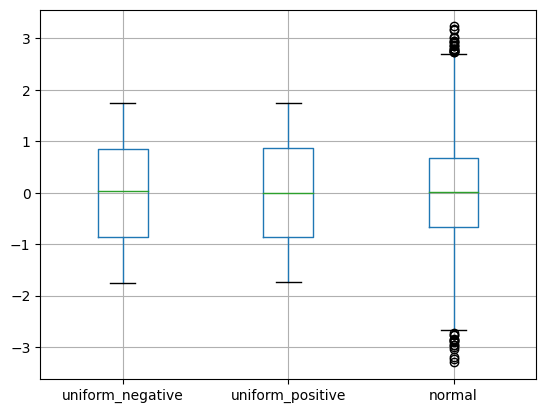

In [13]:
normalised_df.boxplot()

Now the boxplot and describe shows everything is in the same scale. Let's see the distributions with a density plot, both from before and after

Text(0.5, 1.0, 'After Normalisation')

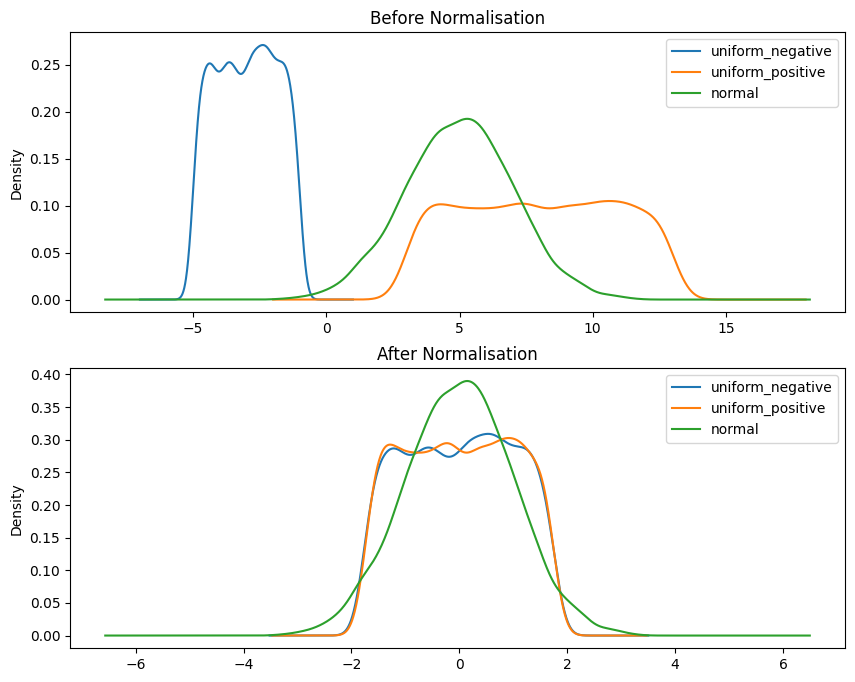

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
data.plot(ax=axes[0], kind='density')
axes[0].set_title("Before Normalisation")
normalised_df.plot(ax=axes[1], kind='density')
axes[1].set_title("After Normalisation")

We can now see the first and second features, which were uniform, changed their width and set their mean at 0 , now being indistinguishible. The third one is still normal and we just moved it.

Let's learn another scalers in the next demo